### import package

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
# define our linear regression
class LinearReg:
    def __init__(self, data):
        '''data: type: pandas dataframe'''
        self.data = data
        self.length = len(data)
    def ols(self, x, y):
        '''
        x: column name
        y: column name
        '''
        X = np.matrix(np.vstack([np.ones(self.length), self.data[x].values]).T)
        y = np.matrix(self.data[y].values).T
        beta = np.linalg.inv(X.T*X)*X.T*y
        return beta
    def sklearn_ols(self, x, y):
        X = np.matrix(self.data[x].values).T
        y = np.matrix(self.data[y].values).T
        # Create linear regression object
        OLS = linear_model.LinearRegression()
        # Train the model using the training sets
        OLS = OLS.fit(X, y)
        y_hat = OLS.predict(X)
        res = y - y_hat
        return {'intercept': OLS.intercept_[0], 'coef': OLS.coef_[0][0]}, res
    def visual(self, x, y, step = 0.01):
        para = self.ols(x, y)
        X = self.data[x]
        Y = self.data[y]
        min_x, max_x = min(X), max(X)
        # x is also matrix
        func = lambda x: x*para
        x_sim = np.arange(min_x, max_x, step)
        xm = np.vstack([np.ones(len(x_sim)), x_sim]).T
        y_sim = func(xm)
        self.data.plot.scatter(x,y)
        plt.plot(x_sim, y_sim)
        plt.title('The Relationship Between {0} and {1}'.format(x, y))

### 3.3

In [39]:
# data
data = pd.read_table('CH01PR19.txt', sep = ' ', header = None).dropna(axis = 1)
data.columns = ['GPA', 'ACT']

The mean of ACT is around 25 and the dataset don't have much outliers.
The distriubtion of ACT score is almost like normal distribution


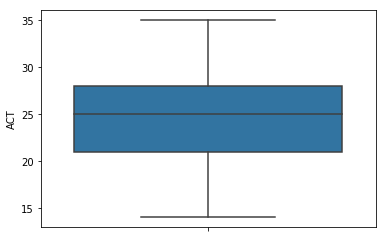

In [73]:
# (a) boxplot
sns.boxplot(data['ACT'], orient = 'v')
print("The mean of ACT is around 25 and the dataset don't have much outliers.")
print("The distriubtion of ACT score is almost like normal distribution")

The residual have equal variance


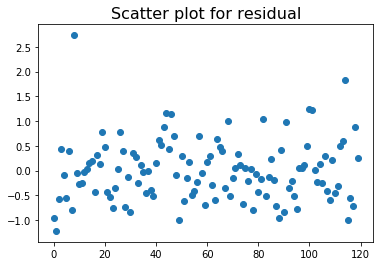

In [21]:
# (b) dot plot of the residuals
LReg33 = LinearReg(data = data)
beta_ols = LReg33.sklearn_ols(x = 'ACT', y = 'GPA')
intercept = beta_ols[0][0]
slope = beta_ols[1][0]
f33 = lambda x: slope*x + intercept
plt.scatter(data.index, (data['ACT'].map(f33) - data['GPA']))
plt.title('Scatter plot for residual', fontsize = 16)
print('The residual have equal variance')

Text(0.5,1,'residual against y hat')

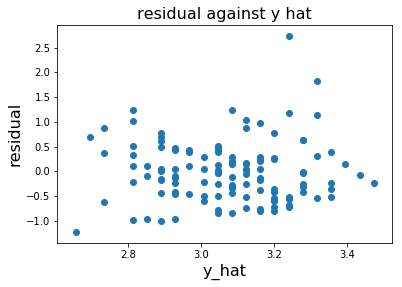

In [24]:
# (c)
plt.scatter(data['ACT'].map(f33), (data['ACT'].map(f33) - data['GPA']))
plt.xlabel('y_hat', fontsize = 16)
plt.ylabel('residual', fontsize = 16)
plt.title('residual against y hat', fontsize = 16)

the distribution of residual is positively skewed distribution


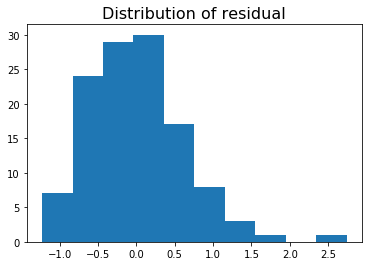

In [22]:
plt.hist(data['ACT'].map(f33) - data['GPA'])
plt.title('Distribution of residual', fontsize = 16)
print('the distribution of residual is positively skewed distribution')

In [8]:
# (d)
def qq_plot(data):
    # calculate Q-Q
    S_mean = np.mean(data)
    S_std = np.std(data)
    S_return = pd.DataFrame(data)
    S_return_norm = (S_return - S_mean)*1.0/S_std
    S_return_norm.columns = ['return_norm']
    S_return_norm_sort = S_return_norm.sort_values(by = 'return_norm')
    S_return_norm_sort.index = range(len(S_return_norm_sort))
    S_return_norm_sort['percentage'] = [(i+1)*1.0/len(S_return_norm_sort) for i in range(len(S_return_norm_sort))]
    S_return_norm_sort['norm'] = S_return_norm_sort['percentage'].map(stats.norm(0,1).ppf)
    x = S_return_norm_sort.iloc[10:-10]['return_norm']
    y = S_return_norm_sort.iloc[10:-10]['norm']
    # plot
    plt.figure(figsize=(8, 4))
    plt.scatter(x, y, marker = ".")
    plt.scatter(x, x, marker = ".")
    plt.xlabel('Theoretical Quantile', fontsize = 16)
    plt.ylabel('Sample Quantile', fontsize = 16)
    plt.title('QQ plot', fontsize = 16)

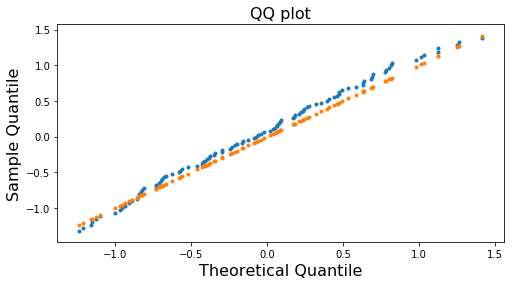

In [23]:
qq_plot(data['ACT'].map(f33) - data['GPA'])

In [74]:
residual = sorted(data['ACT'].map(f33) - data['GPA'])
standard_residual = (residual - np.mean(residual))/np.std(residual)
norm_res = sorted(np.random.normal(0, 1, len(residual)))
print('The correlation coefficient is ', round(np.corrcoef(standard_residual, norm_res)[0][1], 4))
print('Since n = 120, alpha = 0.05, from Table B.6, the critical value is 0.987 >= 0.978 . We can conclude that the distribution of erro terms departs from a normal distribution.')

The correlation coefficient is  0.98
Since n = 120, alpha = 0.05, from Table B.6, the critical value is 0.987 >= 0.978 . We can conclude that the distribution of erro terms departs from a normal distribution.


In [46]:
# (e)

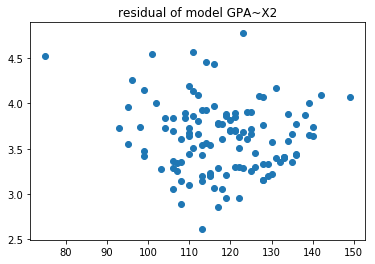

Text(0.5,1,'residual of model GPA~X3')

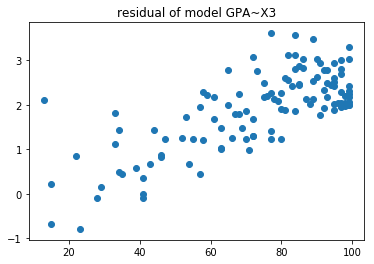

In [72]:
# (f)
CH03PR03 = pd.read_excel('CH03PR03.xlsx', header = None)
CH03PR03.columns = ['GPA', 'ACT', 'X2', 'X3']
CH03 = LinearReg(CH03PR03)
# X2
intercept1 = CH03.sklearn_ols(x = 'X2', y = 'GPA')[0][0]
slope1 = CH03.sklearn_ols(x = 'X2', y = 'GPA')[1][0]
f1 = lambda x: x*slope + intercept
# X3
intercept2 = CH03.sklearn_ols(x = 'X3', y = 'GPA')[0][0]
slope2 = CH03.sklearn_ols(x = 'X3', y = 'GPA')[1][0]
f2 = lambda x: x*slope + intercept
# residual
res1 = f1(CH03PR03['X2']) - CH03PR03['GPA']
res2 = f2(CH03PR03['X3']) - CH03PR03['GPA']
# plot
plt.scatter(CH03PR03['X2'], res1)
plt.title('residual of model GPA~X2')
plt.show()
plt.scatter(CH03PR03['X3'], res2)
plt.title('residual of model GPA~X3')

## 3.9 Fake

In [98]:
CH03PR09 = pd.read_table('CH03PR09.txt', header = None, sep = ' ').replace(np.nan, 0)
CH03PR09['x'] = CH03PR09[2] + CH03PR09[3]
CH03PR09['residual'] = CH03PR09[5] + CH03PR09[6]
CH03PR09 = CH03PR09[['x', 'residual']]

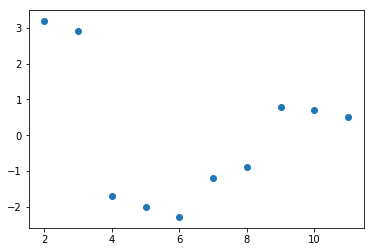

In [103]:
plt.scatter(CH03PR09['x'], CH03PR09['residual'])

## 3.16

In [104]:
def w(lambda_, predictor):
    Y = Ch3Pr15['Y']
    n = length(Y)
    K2 = (prod(Y))**(1/n)
    K1 = 1/(lambda_*K2^(lambda_ - 1))
    return(ifelse(lambda_==0, K2*log(predictor), K1*Predictor**lambda_-1))
lam = [-0.2, -0.1, 0, 0.1, 0.2]
sse = []
for i in range(1, 6):
    YY = []
    for j in range(1, 16):
        YY = [YY, w(lam[i], Y[j])]
    L = lm(YY~X)
    SSE = [SSE, sum(L['residual'])**2]
print('The best lambda is ', lam[sorted(SSE)[1]])

In [105]:
print('The best lambda is ', 0)

The best lambda is  0


## 3.24

y = 1.621x + 53.068


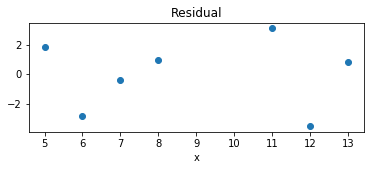

In [132]:
# (a)
x = [5, 8, 11, 7, 13, 12, 6]
y = [63, 67, 74, 64, 75, 69, 60]
data324 = pd.DataFrame({'x': x, 'y': y})
Lm34 = LinearReg(data324)
coefs = Lm34.sklearn_ols(x = 'x', y = 'y')
intercept = coefs[0][0]
slope = coefs[1][0]
fun324 = lambda x: slope*x + intercept
plt.figure(figsize = (6, 2))
plt.scatter(data324['x'], data324['y'] - data324['x'].map(fun324))
plt.title('Residual')
plt.xlabel('x')
print('y = {0}x + {1}'.format(round(slope,3), round(intercept, 3)))

## 3.31

In [4]:
APPENC07 = pd.read_excel('APPENC07.xlsx', header = None)
APPENC07.columns = ['id', 'sale_price', 'finished_square_feet', 'number_of_bedrooms', 'number_of_bathrooms',\
                           'air_condition', 'garage_size', 'pool', 'year_built', 'quality', 'style', 'lot_size', \
                           'adjacent_to_highway']
# random sample
APPENC07_sample = APPENC07.sample(200)
lm331 = LinearReg(APPENC07_sample)
coefs331 = lm331.sklearn_ols(x = 'finished_square_feet', y = 'sale_price')
coefs331[0]

{'intercept': -94073.69263459643, 'coef': 163.3009486714194}

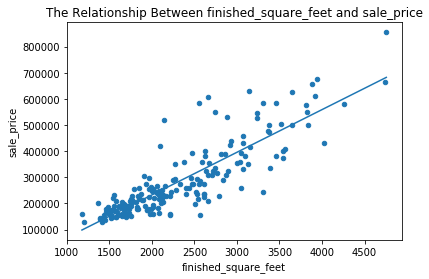

In [5]:
lm331.visual(x = 'finished_square_feet', y = 'sale_price')

Text(0,0.5,'residual')

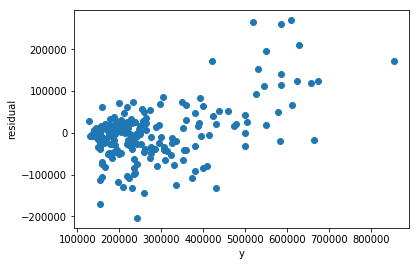

In [6]:
plt.scatter(APPENC07_sample['sale_price'], list(coefs331[1]))
plt.xlabel('y')
plt.ylabel('residual')

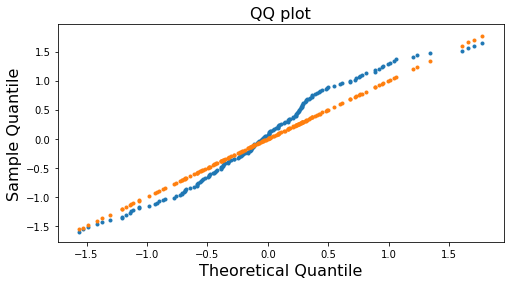

In [9]:
qq_plot(coefs331[1])

In [37]:
from scipy import stats
APPENC07_sample['xBoxcox'] = stats.boxcox(APPENC07_sample['finished_square_feet'], 0.1)
lm331new = LinearReg(APPENC07_sample)
coefs331new = lm331new.sklearn_ols(x = 'xBoxcox', y = 'sale_price')
coefs331new[0]

{'intercept': -1783825.5398023499, 'coef': 178079.94028817271}

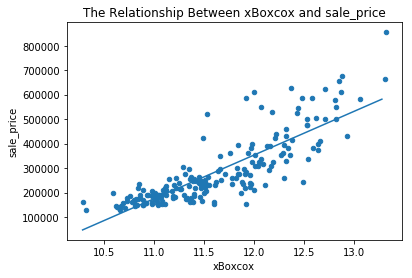

In [39]:
lm331new.visual(x = 'xBoxcox', y = 'sale_price', step = 0.1)

Text(0,0.5,'residual')

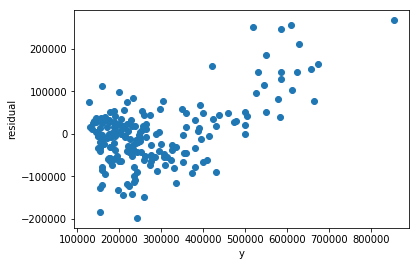

In [40]:
plt.scatter(APPENC07_sample['sale_price'], list(coefs331new[1]))
plt.xlabel('y')
plt.ylabel('residual')

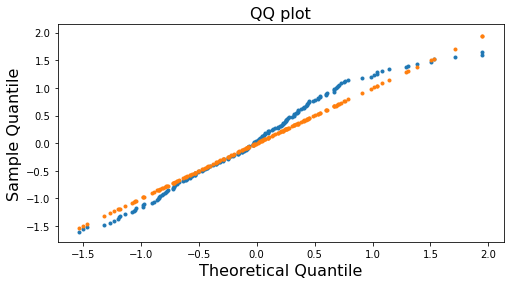

In [41]:
qq_plot(coefs331new[1])

In [49]:
final331_coef = coefs331new[0]['intercept']
final331_slope = coefs331new[0]['coef']
final_fun331 = lambda x: final331_slope*x + final331_coef
# X = 1100
print('X = 1100: ', final_fun331(stats.boxcox(1100, 0.1)))
# X = 4900
print('X = 4900: ', final_fun331(stats.boxcox(4900, 0.1)))

X = 1100:  22564.14583428623
X = 4900:  600563.0655822346


## 3.32

In [105]:
APPENC05 = pd.read_excel('APPENC05.xlsx', header = None)
APPENC05.columns = ['id', 'PSA_level', 'cancer_volume', 'weight', \
                    'age', 'benign_prostatic', 'seminal_vesicle_invasion', \
                    'capsular_penetration', 'gleason_score']
lm332 = LinearReg(APPENC05)
coefs332 = lm332.sklearn_ols(x = 'cancer_volume', y = 'PSA_level')
coefs332[0]

{'intercept': 1.1248504112185174, 'coef': 3.2299341615576593}

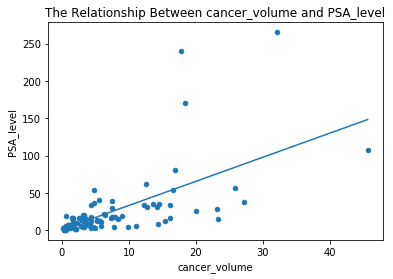

In [106]:
lm332.visual(x = 'cancer_volume', y = 'PSA_level')

Text(0,0.5,'residual')

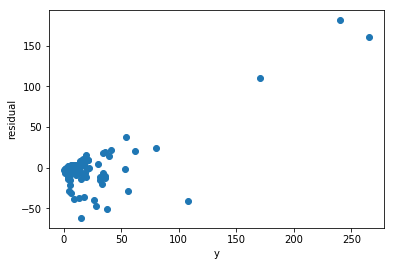

In [107]:
plt.scatter(APPENC05['PSA_level'], list(coefs332[1]))
plt.xlabel('y')
plt.ylabel('residual')

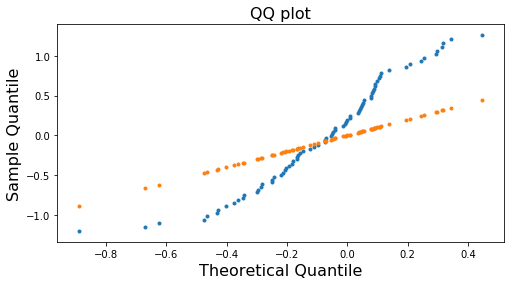

In [108]:
qq_plot(coefs332[1])

In [169]:
APPENC05new = APPENC05[['cancer_volume', 'PSA_level']][APPENC05['PSA_level'] < 100]
APPENC05new['cancer_volume'] = stats.boxcox(APPENC05new['cancer_volume'], 0.1)

In [170]:
lm332 = LinearReg(APPENC05new)
coefs332 = lm332.sklearn_ols(x = 'cancer_volume', y = 'PSA_level')
coefs332[0]

{'intercept': 5.849799111724051, 'coef': 7.368909235407426}

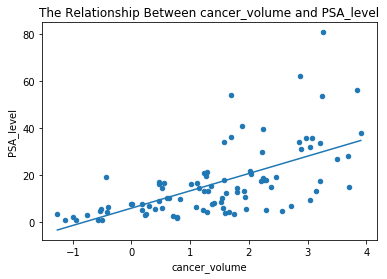

In [171]:
lm332.visual(x = 'cancer_volume', y = 'PSA_level')

Text(0,0.5,'residual')

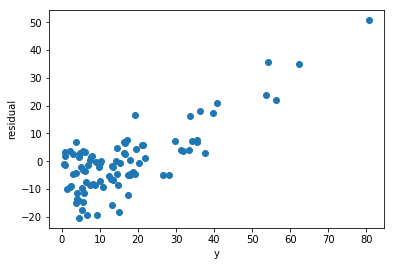

In [172]:
plt.scatter(APPENC05new['PSA_level'], list(coefs332[1]))
plt.xlabel('y')
plt.ylabel('residual')

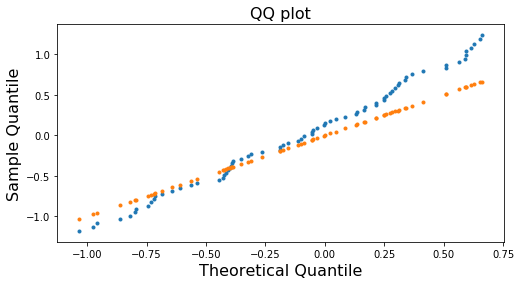

In [173]:
qq_plot(coefs332[1])

In [174]:
final332_coef = coefs332[0]['intercept']
final332_slope = coefs332[0]['coef']
final_fun332 = lambda x: final332_slope*x + final332_coef
# X = 20
print('X = 20: ', final_fun332(stats.boxcox(20, 0.1)))

X = 20:  31.588135131635312
